<a href="https://colab.research.google.com/github/anewsha08/Movie-Recomdations/blob/main/movie_recommandations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
movies_df = pd.read_csv("/content/sample_data/tmdb_5000_movies.csv")
credits_df= pd.read_csv("/content/sample_data/tmdb_5000_credits.csv")
print(movies_df.head())
print(credits_df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [ ]:
credits_df.rename(columns={"movie_id": "id"},inplace=True)
print(credits_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   title   4803 non-null   object
 2   cast    4803 non-null   object
 3   crew    4802 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None


In [ ]:
result_df= pd.merge(movies_df,credits_df,on ="id")
print(result_df.shape)

(4803, 23)


In [ ]:
result_df.drop(["homepage","production_companies","title_x","title_y"],axis=1,inplace=True)
print(result_df.shape)

(4803, 19)


In [ ]:
result_df.dropna(inplace=True)
print(result_df.shape)


(3958, 19)


In [ ]:
v=result_df["vote_count"]
R= result_df["vote_average"]
m= result_df["vote_count"].quantile(0.9)
C= result_df["vote_average"].mean()
result_df["weighted_rating"]=(R*v+m*C)/(v+m)
print(result_df[["original_title","weighted_rating"]])
result_df.sort_values("weighted_rating",ascending=False,inplace=True)
print(result_df[["original_title","weighted_rating"]].head(10))

                    original_title  weighted_rating
1881      The Shawshank Redemption         8.027384
662                     Fight Club         7.913465
65                 The Dark Knight         7.899322
3232                  Pulp Fiction         7.877305
96                       Inception         7.845768
...                            ...              ...
193                    After Earth         5.535984
3746             The Boy Next Door         5.500616
91    Independence Day: Resurgence         5.486526
210                 Batman & Robin         5.383304
242                 Fantastic Four         5.254961

[3958 rows x 2 columns]
                                     original_title  weighted_rating
1881                       The Shawshank Redemption         8.027384
662                                      Fight Club         7.913465
65                                  The Dark Knight         7.899322
3232                                   Pulp Fiction         7.877305
96    

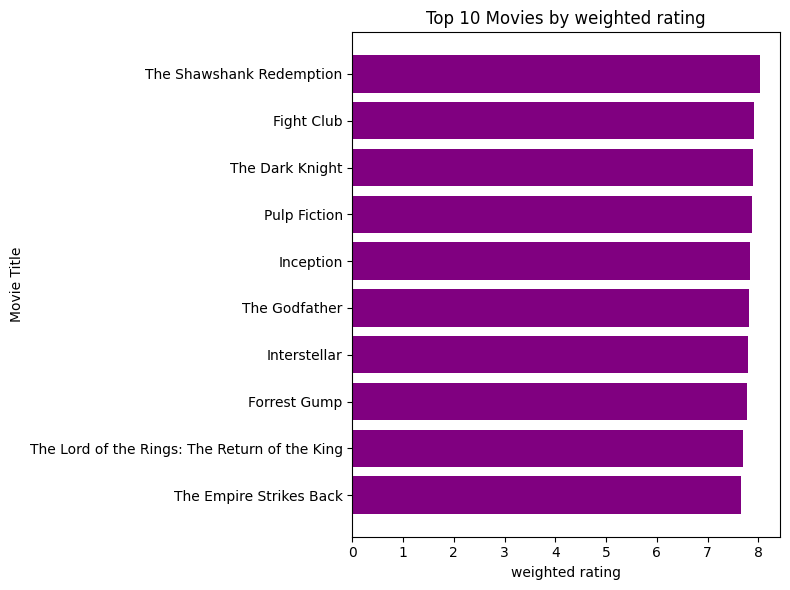

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,6))
res_df_sorted= result_df.head(10).sort_values("weighted_rating")
ax.barh(res_df_sorted["original_title"],res_df_sorted["weighted_rating"],color="purple")
ax.set_xlabel("weighted rating")
ax.set_ylabel("Movie Title")
ax.set_title("Top 10 Movies by weighted rating")
plt.tight_layout()
plt.show()